# Lab1 (Student version)

We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)

3.11.5 (main, Aug 24 2023, 15:09:45) [Clang 14.0.3 (clang-1403.0.22.14.1)]


## Exercise 1: getting things started with undirected graphs

### Question 1

Create manually an undirected graph (with approximately a dozen nodes) _test_graph.txt_ and store it in a text file in the format (for each line):

x    y 

Where x and y are separated with a tabulation. You will use them to test your codes.

In [2]:
def read_graph(filename):
    graph = []

    with open(filename, "r") as f:
        for line in f.readlines():
            if line.startswith("#"): continue
            line = line.strip().replace("\t", " ")
            tuplee = line.split(" ")
            from_id, to_id = int(tuplee[0]), int(tuplee[1])
            liste = [from_id, to_id]
            liste.sort()
            graph.append(liste)

    return graph

read_graph("./test_graph.txt")

[[0, 1],
 [1, 2],
 [0, 2],
 [0, 3],
 [4, 5],
 [5, 6],
 [7, 8],
 [5, 8],
 [0, 5],
 [1, 5]]

### Question 2

Download the following graphs (be careful these datasets are quite heavy):

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download _graph.txt_ and _bugged_graph.txt_ from https://moodle-sciences-23.sorbonne-universite.fr

These datasets allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing the graph in memory). 

In [3]:
def number_of_edges_and_nodes(filename):
    n = 0
    nodes = set()
    with open(filename, "r") as f:
        for line in f.readlines():
            if line.startswith("#"): continue
            line = line.strip().replace("\t", " ")
            a, b = line.split(" ")
            n += 1
            nodes.add(int(a))
            nodes.add(int(b))
    return n, len(nodes)

edges, nodes = number_of_edges_and_nodes("./test_graph.txt")
print(f"test_graph.txt has {edges} edges and {nodes} nodes")

# print("amazon graph:", *number_of_edges("./com-amazon.ungraph.txt")); 
# print("lj graph:", *number_of_edges("./com-lj.ungraph.txt")); 

test_graph.txt has 10 edges and 9 nodes


### Question 3bis

Apply the previous code to _bugged_graph.txt_ and then look at the content of the file. Does it correspond to the expected result? Explain in one sentence what the problem is.

In [4]:
edges, nodes = number_of_edges_and_nodes("./bugged_graph.txt")
print(f"bugged_graph.txt has {edges} edges and {nodes} nodes")

'''Since there are more than one of the same edge (4 -> 6), it is counted more than once thus, the result is incorrect.'''

bugged_graph.txt has 18 edges and 10 nodes


'Since there are more than one of the same edge (4 -> 6), it is counted more than once thus, the result is incorrect.'

### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory).

In [5]:
def get_degree_of_node(filename, node_id):
    n = 0
    with open(filename, "r") as f:
        for line in f.readlines():
            if line.startswith("#"): continue
            line = line.strip().replace("\t", " ")
            tuplee = line.split(" ")
            listee = int(tuplee[0]), int(tuplee[1])

            n += sum([1 if node_id == x else 0  for x in listee])
    return n

get_degree_of_node("./bugged_graph.txt", 0)

3

## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python **dictionary of lists**. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [6]:
def read_graph_as_dict(filename):
    g = {}
    with open(filename, "r") as f:
        for line in f.readlines():
            if line.startswith("#"): continue
            line = line.strip().replace("\t", " ")
            tuplee = line.split(" ")
            id_from, id_to = int(tuplee[0]), int(tuplee[1])

            if id_from in g:
                g[id_from].append(id_to)
            else:
                g[id_from] = [id_to]

            # since it is undirected
            if id_to in g:
                g[id_to].append(id_from)
            else:
                g[id_to] = [id_from]

    return g 

read_graph_as_dict("./test_graph.txt")

{0: [1, 2, 3, 5],
 1: [0, 2, 5],
 2: [1, 0],
 3: [0],
 4: [5],
 5: [4, 6, 8, 0, 1],
 6: [5],
 7: [8],
 8: [7, 5]}

### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

Use it on _bugged_graph.txt_ to create a graph _clean_graph.txt_ without self-loops and duplicated edges.

In [7]:

def delete_dupes(g: dict):
    g_ = {}
    edges = set()
    for id_from, listee in g.items():
        for id_to in listee:
            a, b = min(id_from, id_to), max(id_from, id_to)
            if (a, b) in edges: continue
            if a == b: continue
            edges.add((a, b))
    for (a, b) in edges:
        if a in g_:
            g_[a].append(b)
        else:
            g_[a] = [b]
    return g_

def write_graph(g: dict, path: str):
    with open(path, "w") as f:
        for id_from, listee in g.items():
            for is_to in listee:
                f.writelines(f"{id_from} {is_to}\n")
    return True


g_1 = read_graph_as_dict("./bugged_graph.txt")

g_2 = delete_dupes(g_1)

write_graph(g_2, "clean_graph.txt")

True

### Question 7

Try the data structure of Question 5 on the two graphs downloaded in Question 2, can you load them in memory? Can you print them on the screen?

Conclude on the scalability (meaning what graph size can you handle with this data structure).

In [8]:
g_amazon = read_graph_as_dict("./com-amazon.ungraph.txt")
g_lj = read_graph_as_dict("./com-lj.ungraph.txt")

In [9]:
g_amazon

{1: [88160, 118052, 161555, 244916, 346495, 444232, 447165, 500600],
 88160: [1, 48724, 102091, 160086, 161555, 346495, 413439],
 118052: [1,
  8487,
  18733,
  44400,
  77015,
  112833,
  143523,
  161555,
  244916,
  278797,
  286641,
  407256,
  441749,
  444232,
  479787,
  498948,
  500600,
  512593],
 161555: [1,
  36179,
  52569,
  88160,
  118052,
  143523,
  150819,
  156082,
  168806,
  206115,
  222934,
  228193,
  236769,
  244916,
  248343,
  278797,
  286641,
  302664,
  306473,
  309883,
  312273,
  346495,
  388008,
  407256,
  413439,
  447165,
  453257,
  470778,
  487993,
  500600,
  512593],
 244916: [1,
  18733,
  52569,
  84247,
  97522,
  118052,
  136595,
  143523,
  156082,
  161555,
  194762,
  213742,
  222934,
  236769,
  278797,
  295719,
  302865,
  395224,
  405093,
  407256,
  407725,
  423157,
  447165,
  492325,
  500600,
  531378],
 346495: [1, 88160, 143523, 161555, 215091, 310947, 413439, 500600, 526434],
 444232: [1, 78565, 118052, 184835, 286641, 

In [10]:
g_lj

{0: [1,
  2,
  31,
  73,
  80,
  113619,
  2468556,
  2823829,
  2823833,
  2846857,
  2947898,
  3011654,
  3701688,
  3849377,
  4036524,
  4036525,
  4036527,
  4036529,
  4036531,
  4036533,
  4036534,
  4036536,
  4036537],
 1: [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  34564,
  231066,
  263256,
  658434,
  3341177],
 2: [0, 1],
 31: [0,
  1,
  3,
  8,
  10,
  11,
  12,
  13,
  18,
  25,
  28,
  29,
  36,
  38,
  42,
  49,
  54,
  57,
  61,
  916,
  1614,
  1677,
  2455,
  2812,
  4334,
  4345,
  4508,
  6179,
  12797,
  20982,
  30188,
  33895,
  33971,
  33992,
 

In [11]:
'''Yes we can load them into the memory. The file size of amazon is ~14Mb and lj is ~500Mb. We can also display them but it is hard for any human to read'''

'Yes we can load them into the memory. The file size of amazon is ~14Mb and lj is ~500Mb. We can also display them but it is hard for any human to read'

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [12]:
def calculate_degrees(g):
    degrees = {id_node:len(elements) for id_node, elements in g.items()}

    alldegrees = {}
    for _, degree in degrees.items():
      if degree not in alldegrees:
        alldegrees[degree] = 1
      else:
        alldegrees[degree] += 1
    
    return alldegrees

g_amazon_degrees = calculate_degrees(g_amazon)
g_amazon_degrees

{8: 12131,
 7: 16799,
 18: 1152,
 31: 186,
 26: 362,
 9: 8801,
 6: 24523,
 5: 59781,
 16: 1693,
 10: 6863,
 4: 62072,
 11: 5155,
 12: 4067,
 3: 51042,
 14: 2544,
 19: 969,
 2: 37326,
 37: 97,
 15: 2029,
 99: 4,
 58: 23,
 1: 25709,
 20: 810,
 24: 474,
 30: 224,
 22: 622,
 35: 125,
 36: 120,
 32: 176,
 81: 4,
 17: 1468,
 97: 3,
 29: 250,
 136: 4,
 13: 3262,
 23: 548,
 44: 71,
 28: 267,
 74: 7,
 25: 419,
 47: 41,
 21: 727,
 39: 95,
 38: 98,
 90: 4,
 40: 79,
 100: 3,
 33: 147,
 57: 27,
 80: 8,
 34: 142,
 49: 43,
 131: 1,
 145: 2,
 42: 68,
 118: 1,
 56: 27,
 46: 59,
 52: 28,
 54: 34,
 196: 2,
 61: 16,
 142: 3,
 73: 10,
 95: 3,
 43: 55,
 64: 14,
 72: 7,
 549: 1,
 50: 41,
 60: 14,
 68: 21,
 124: 2,
 65: 14,
 63: 19,
 53: 36,
 51: 30,
 27: 316,
 45: 53,
 230: 1,
 149: 2,
 105: 5,
 59: 24,
 85: 8,
 83: 6,
 48: 51,
 41: 71,
 165: 1,
 55: 22,
 89: 4,
 84: 2,
 82: 9,
 151: 2,
 67: 12,
 94: 5,
 77: 4,
 101: 1,
 71: 6,
 96: 5,
 108: 3,
 98: 4,
 127: 1,
 197: 1,
 86: 5,
 179: 1,
 76: 8,
 69: 12,
 70:

### Question 9

Plot the degree distribution in logarithmic scale (using matplotlib for example). Be careful to choose an adequate plotting style.

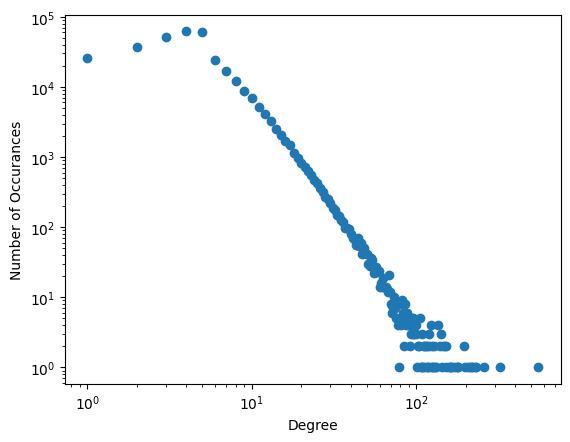

In [13]:
def plot_graph_degrees(g_degrees):
    g_degrees_list = list(g_degrees.items())
    g_degrees_deg, g_degrees_occ = [a for a, b in g_degrees_list], [b for a, b in g_degrees_list]
    plt.scatter(g_degrees_deg, g_degrees_occ)

    plt.xlabel("Degree"); plt.ylabel("Number of Occurances") 
    plt.xscale("log"); plt.yscale("log")
    plt.show()

plot_graph_degrees(g_amazon_degrees)

## Exercise 3: the case of directed graphs

### Question 10

Download the following directed graph:

http://konect.cc/networks/web-Google/

By adapting your codes for undirected graphs to directed graphs, load it in memory into a double ajacency list format.

In [14]:
def read_graph_as_dict_undirected(filename):
    g = {}
    with open(filename, "r") as f:
        for line in f.readlines():
            if line.startswith("#"): continue
            line = line.strip().replace("\t", " ")
            tuplee = line.split(" ")
            id_from, id_to = int(tuplee[0]), int(tuplee[1])

            if id_from in g:
                g[id_from].append(id_to)
            else:
                g[id_from] = [id_to]
    return g 

g_google = read_graph_as_dict_undirected("./web-Google.txt")
g_google

{0: [11342, 824020, 867923, 891835],
 11342: [0,
  27469,
  38716,
  309564,
  322178,
  387543,
  427436,
  538214,
  638706,
  645018,
  835220,
  856657,
  867923,
  891835],
 824020: [0,
  91807,
  322178,
  387543,
  417728,
  438493,
  500627,
  535748,
  695578,
  867923,
  891835],
 867923: [0,
  11342,
  136593,
  414038,
  500627,
  523684,
  760842,
  815602,
  835220,
  846213,
  857527,
  891835],
 891835: [0,
  11342,
  112028,
  235849,
  302284,
  417728,
  451592,
  693969,
  857527,
  867923],
 1: [53051,
  203402,
  223236,
  276233,
  552600,
  569212,
  635575,
  748615,
  862566,
  893884],
 203402: [1,
  53051,
  164684,
  184896,
  184984,
  223236,
  240041,
  276233,
  284930,
  303045,
  384341,
  408707,
  436135,
  449352,
  532018,
  539143,
  552600,
  569212,
  573555,
  604413,
  635575,
  648208,
  748615,
  773119,
  789543,
  792151,
  824625,
  838771,
  862566,
  893884],
 223236: [8517,
  14456,
  51573,
  150176,
  187770,
  189348,
  202191,
  2

### Question 11

Plot in log-log scale both the in-degree distribution and the out-degree distribution of this graph.

In [15]:
#devo farlo di entrambe le distribuzioni?
def degreeDistribution(dict):
    outDegreeDistr={}
    for key, list in dict.items():
        outDegree=len(list)
        if outDegree not in outDegreeDistr:
            outDegreeDistr[outDegree]=1
        else:
            outDegreeDistr[outDegree]+=1

    inDegreeDistr_nc={}
    for fromm, list in dict.items():
      for towards in list:
        if towards not in inDegreeDistr_nc:
          inDegreeDistr_nc[towards]=1
        else:
          inDegreeDistr_nc[towards]+=1

    inDegreeDistr = {}
    for _, degree in inDegreeDistr_nc.items():
      if degree not in inDegreeDistr:
        inDegreeDistr[degree] = 1
      else:
        inDegreeDistr[degree] += 1

    return outDegreeDistr, inDegreeDistr

g_google_outdegrees, g_google_indegrees = degreeDistribution(g_google)

Out-Degree


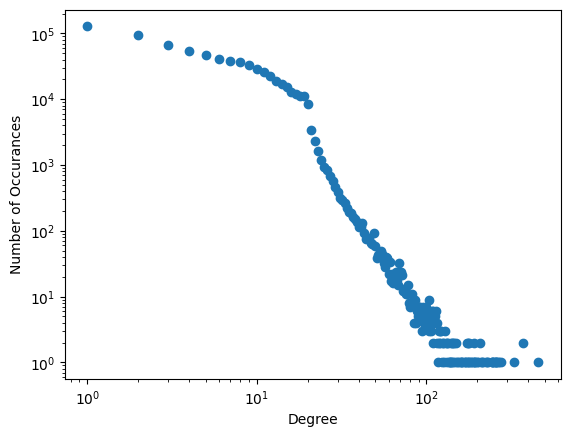

In-Degree


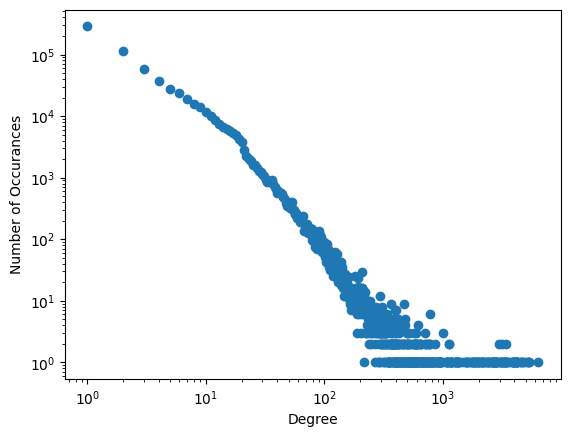

In [16]:
print("Out-Degree"); plot_graph_degrees(g_google_outdegrees)
print("In-Degree"); plot_graph_degrees(g_google_indegrees)